## UTS Pengolahan Citra Digital 
### - Nama : Hafizh Hilman Asyhari
### - NIM : 202331206
### - Kelas : D
### - Program Studi : Teknik Informatika
### - Tahun : 2025
### - Project 3. Backlight Citra

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Fungsi untuk menampilkan gambar berdampingan
def show_images(images, titles):
    n = len(images)
    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i], cmap='gray' if len(images[i].shape) == 2 else None)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()


In [3]:
# Path gambar
image_path = 'Foto-Backlight-Saya.jpg'
img = cv2.imread(image_path)

if img is None:
    raise FileNotFoundError("Gambar tidak ditemukan, pastikan path sudah benar.")

In [4]:
# Fungsi untuk menampilkan histogram
def plot_histogram(image, title):
    plt.figure()
    if len(image.shape) == 2:  # grayscale
        plt.hist(image.ravel(), 256, [0, 256])
    else:  # RGB
        colors = ('r', 'g', 'b')
        for i, col in enumerate(colors):
            plt.hist(image[:, :, i].ravel(), 256, [0, 256], color=col, alpha=0.5, label=col)
        plt.legend()
    plt.title(f'Histogram - {title}')
    plt.xlabel('Intensitas')
    plt.ylabel('Jumlah Piksel')
    plt.grid(True)
    plt.show()

In [5]:
# Ubah ke RGB dan Grayscale
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

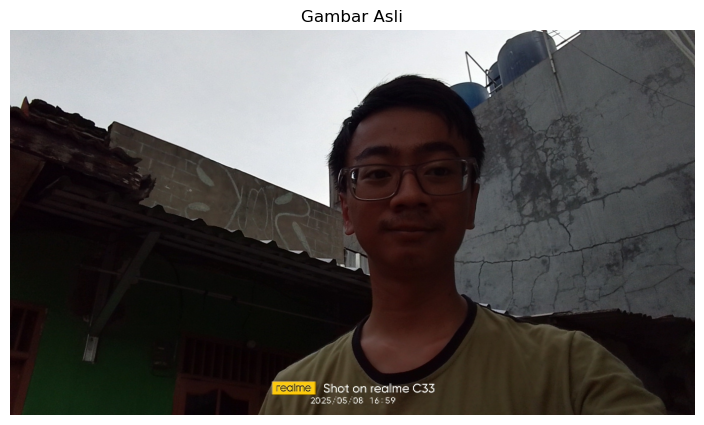

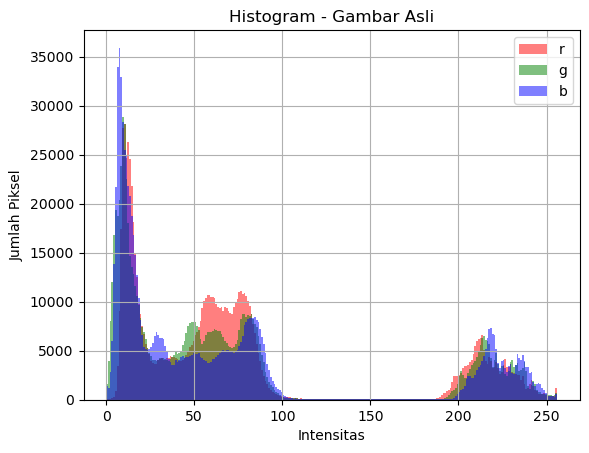

In [6]:
# Tampilkan gambar asli dan histogram
show_images([img_rgb], ['Gambar Asli'])
plot_histogram(img_rgb, 'Gambar Asli')

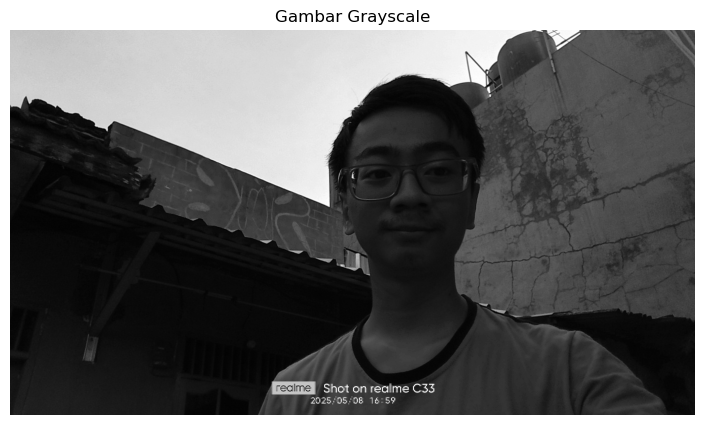

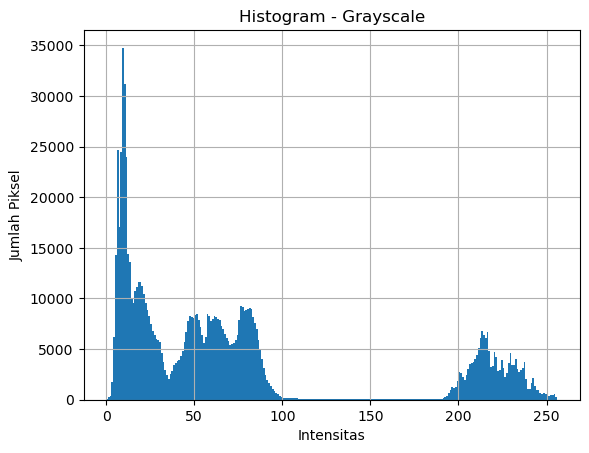

In [7]:
# Tampilkan grayscale dan histogram
show_images([gray], ['Gambar Grayscale'])
plot_histogram(gray, 'Grayscale')

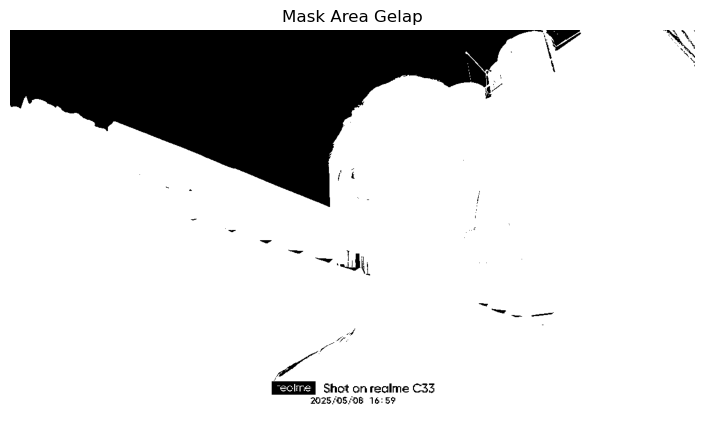

In [8]:
# Threshold untuk mendeteksi area gelap
_, mask = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
show_images([mask], ['Mask Area Gelap'])

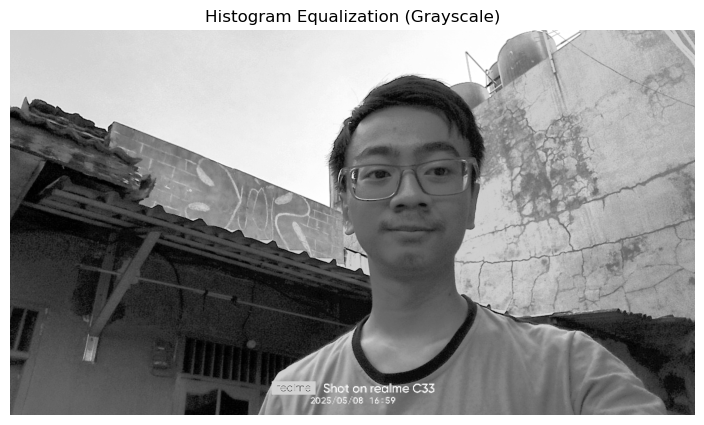

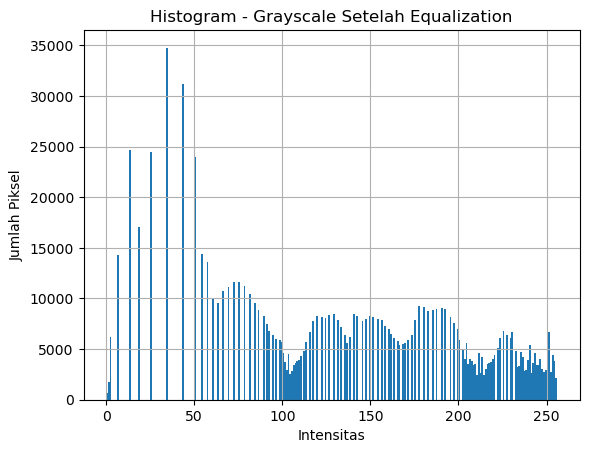

In [9]:
# Histogram Equalization
gray_eq = cv2.equalizeHist(gray)
show_images([gray_eq], ['Histogram Equalization (Grayscale)'])
plot_histogram(gray_eq, 'Grayscale Setelah Equalization')

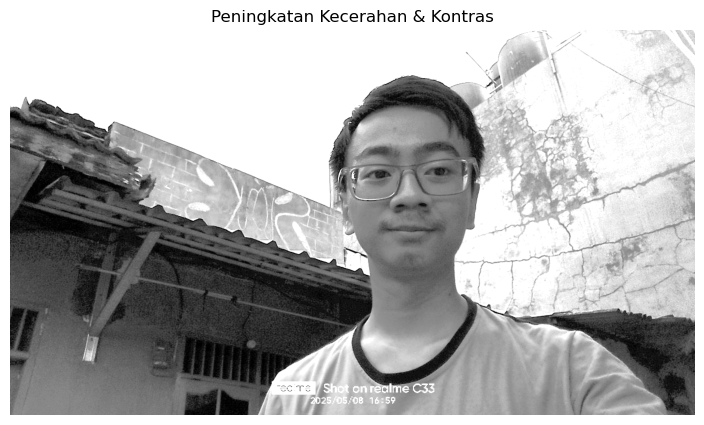

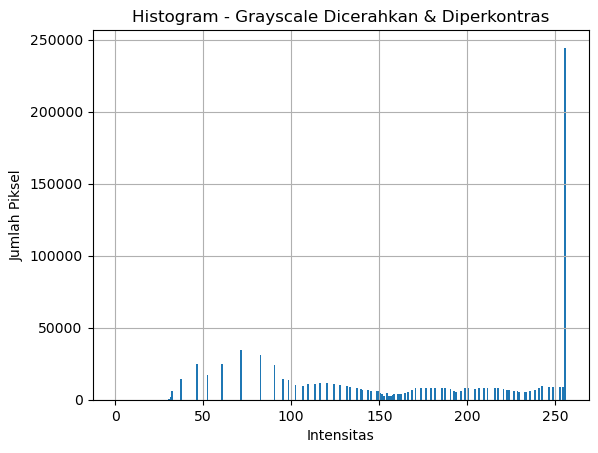

In [10]:
# Peningkatan kecerahan dan kontras
alpha = 1.2  # kontras
beta = 30    # kecerahan
img_bright_contrast = cv2.convertScaleAbs(gray_eq, alpha=alpha, beta=beta)
show_images([img_bright_contrast], ['Peningkatan Kecerahan & Kontras'])
plot_histogram(img_bright_contrast, 'Grayscale Dicerahkan & Diperkontras')

In [11]:
# Gabungkan dengan mask
final_img = cv2.bitwise_and(img_bright_contrast, mask)
background = cv2.bitwise_and(gray, cv2.bitwise_not(mask))
result = cv2.add(final_img, background)

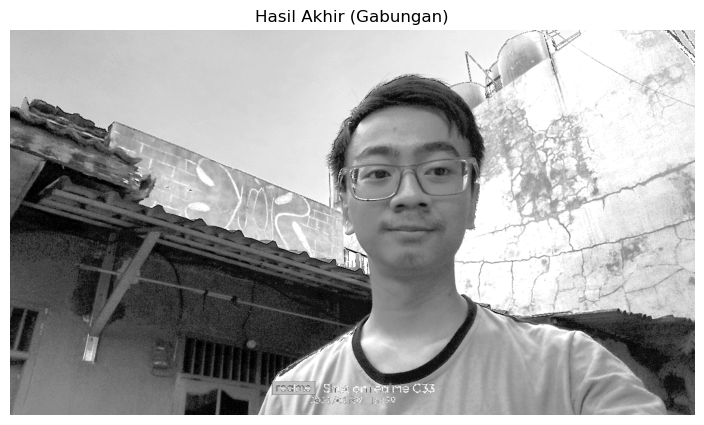

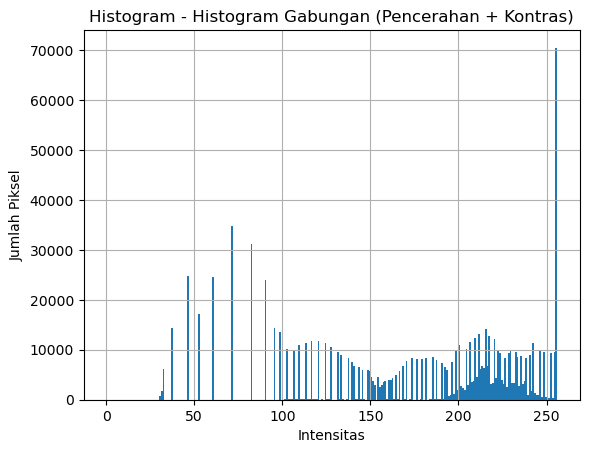

In [12]:
# Tampilkan hasil akhir
show_images([result], ['Hasil Akhir (Gabungan)'])
plot_histogram(result, 'Histogram Gabungan (Pencerahan + Kontras)')

In [13]:
# Simpan hasil
result_bgr = cv2.cvtColor(result, cv2.COLOR_GRAY2BGR)
cv2.imwrite('hasil_perbaikan_backlight.jpg', result_bgr)

True

In [14]:
print("Proses perbaikan gambar selesai.")

Proses perbaikan gambar selesai.
